# Report: Climate Change Impact on Agriculture
## Table of Content

1. Main Question

2. Description

3. Data Loading and Transformation

4. Visualization of Data

5. Results

6. Conclusion

### 1. Main Question

Analyze the correlation between temperature changes and agricultural yields using NASA GISS and FAO data.

### 2. Description

Agriculture, the cornerstone of global food security, is under mounting pressure from climate change, with rising temperatures and extreme weather events posing significant threats to crop yields and livelihoods.

The primary objective of this analysis is to explore and comprehend the intricate relationship between changes in temperature patterns and their potential impact on agricultural yields. By examining two distinct datasets—NASA GISS for temperature records and FAO for agricultural yield data—the aim is to uncover patterns, trends, and correlations that can provide valuable insights into the dynamic interplay between climate conditions and crop productivity.

### 3. Data Loading and Transformation

#### Datasource1: NASA GISS Surface Temperature Analysis dataset
Metadata URL: https://data.giss.nasa.gov/gistemp/

Data URL: https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv

Data Type: CSV

In data transformation we retrieve monthly temperature data from NASA GISS for the period 1961-2022. We then clean and filter the data to ensure its accuracy and relevance for analysis. The final DataFrame contains monthly temperature data for each year from 1961 to 2022, providing valuable insights into global temperature trends.

#### Datasource2: FAO - Food and Agriculture Organization of the United Nations
Metadata URL: https://www.fao.org/faostat/en/#data

Data URL: https://fenixservices.fao.org/faostat/static/bulkdownloads/Production_Crops_Livestock_E_All_Data_(Normalized).zip

Data Type: CSV

The FAO dataset, on the other hand, focuses on agricultural yield information, capturing the outcomes of various crops across different regions.
This code extracts and preprocesses crop yield data from the FAOSTAT database. The data is first filtered to only include data for the crop yield element. Then, the data is further filtered to only include the columns of interest: area code, area, item code, item, year, and value. Finally, the code calculates the total yield for each year and crop by summing the individual yield values. The resulting DataFrame contains the total yield for each year and crop.

In [42]:
import pandas as pd
from zipfile import ZipFile
import requests
from io import BytesIO
import sqlite3


# To download and preprocess NASA GISS dataset
nasa_giss_url = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
nasa_data = pd.read_csv(nasa_giss_url, skiprows=1)

# Remove unwanted columns and rows from NASA dataset
nasa_data = nasa_data[['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'J-D', 'D-N']]
nasa_data = nasa_data[(nasa_data['Year'] >= 1961) & (nasa_data['Year'] <= 2022)]
nasa_data

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N
81,1961,0.07,0.19,0.09,0.13,0.12,0.12,0.01,0.01,0.09,0.00,0.03,-.16,.06,.09
82,1962,0.05,0.15,0.10,0.05,-0.06,0.03,0.02,-0.01,0.00,0.01,0.06,-.03,.03,.02
83,1963,-0.03,0.18,-0.14,-0.07,-0.06,0.05,0.06,0.23,0.18,0.15,0.15,-.03,.05,.05
84,1964,-0.09,-0.10,-0.21,-0.32,-0.25,-0.04,-0.04,-0.22,-0.29,-0.31,-0.21,-.30,-.20,-.18
85,1965,-0.08,-0.17,-0.13,-0.19,-0.12,-0.08,-0.13,-0.04,-0.15,-0.05,-0.06,-.08,-.11,-.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2018,0.82,0.85,0.89,0.89,0.82,0.77,0.83,0.77,0.80,1.02,0.82,.91,.85,.85
139,2019,0.93,0.95,1.17,1.02,0.85,0.90,0.95,0.95,0.93,1.00,0.99,1.09,.98,.96
140,2020,1.17,1.24,1.17,1.13,1.01,0.91,0.90,0.87,0.98,0.88,1.10,.81,1.02,1.04
141,2021,0.81,0.64,0.89,0.76,0.78,0.84,0.92,0.82,0.92,1.00,0.94,.86,.85,.84


In [43]:
# To download and preprocess FAO dataset
fao_zip_url = "https://fenixservices.fao.org/faostat/static/bulkdownloads/Production_Crops_Livestock_E_All_Data_(Normalized).zip"
response = requests.get(fao_zip_url)
with ZipFile(BytesIO(response.content)) as zip_file:
    fao_data = pd.read_csv(zip_file.extract('Production_Crops_Livestock_E_All_Data_(Normalized).csv'), encoding='latin1', low_memory=False)

# Remove unwanted columns from FAO dataset
fao_data = fao_data[fao_data['Element'] == 'Yield']
fao_data = fao_data[['Area Code', 'Area', 'Item Code', 'Item', 'Year', 'Value']]
fao_data['Total_Yield'] = fao_data.groupby(['Item', 'Year'])['Value'].transform('sum')
fao_data


,Area Code,Area,Item Code,Item,Year,Value,Total_Yield
62,2,Afghanistan,221,"Almonds, in shell",1976,16610.0,583491.0
63,2,Afghanistan,221,"Almonds, in shell",1977,15000.0,586796.0
64,2,Afghanistan,221,"Almonds, in shell",1978,20000.0,541514.0
65,2,Afghanistan,221,"Almonds, in shell",1979,17500.0,498298.0
66,2,Afghanistan,221,"Almonds, in shell",1980,17069.0,603849.0
...,...,...,...,...,...,...,...
4127517,5817,Net Food Importing Developing Countries,1735,Vegetables Primary,2018,117519.0,40883396.0
4127518,5817,Net Food Importing Developing Countries,1735,Vegetables Primary,2019,119201.0,41353635.0
4127519,5817,Net Food Importing Developing Countries,1735,Vegetables Primary,2020,118436.0,41428312.0
4127520,5817,Net Food Importing Developing Countries,1735,Vegetables Primary,2021,121842.0,41976128.0


In [44]:
# Merge datasets on common identifiers (Year)
merged_data = pd.merge(fao_data, nasa_data, how='inner', left_on=['Year'], right_on=['Year'])


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import widgets
from IPython.display import display
from ipywidgets import interact

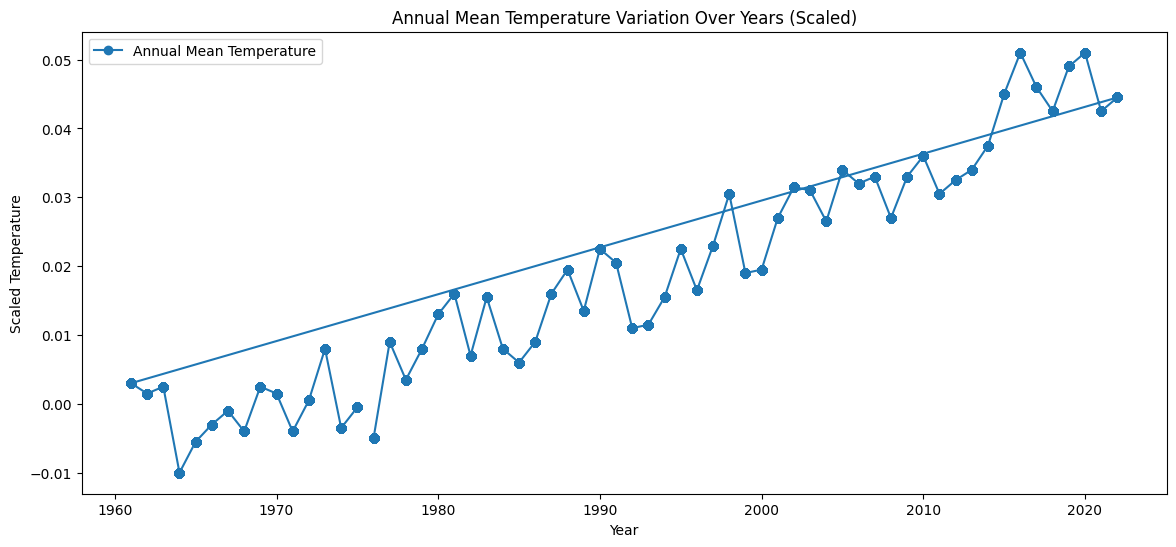

In [46]:
# Time Series Plot for Temperature Variation
# Convert 'J-D' column to numeric
merged_data['J-D'] = pd.to_numeric(merged_data['J-D'], errors='coerce')

# Time Series Plot for Temperature Variation with Scaling
scaling_factor = 0.05  # You can adjust this factor as needed

plt.figure(figsize=(14, 6))
plt.plot(merged_data['Year'], merged_data['J-D'] * scaling_factor, label='Annual Mean Temperature', marker='o')
plt.title('Annual Mean Temperature Variation Over Years (Scaled)')
plt.xlabel('Year')
plt.ylabel('Scaled Temperature')
plt.legend()
plt.show()

### 4. Visualization of data
#### Annual Mean Temperature Variation Over Years (Scaled)
The time series plot illustrates the annual mean temperature variation over a range of years, employing data from the 'J-D' column, which represents the annual mean temperature. To enhance visualization, the 'J-D' values are scaled by a factor of 0.05. The x-axis denotes the years, while the y-axis represents the scaled temperature values. Each data point is marked with a circular marker, providing a clear depiction of the trend in annual mean temperature over the specified timeframe. The plot offers a concise yet informative visualization of how the scaled annual mean temperature fluctuates across the selected years, aiding in the analysis of temperature patterns over time. Adjusting the scaling factor allows for flexibility in emphasizing temperature variations based on specific requirements.

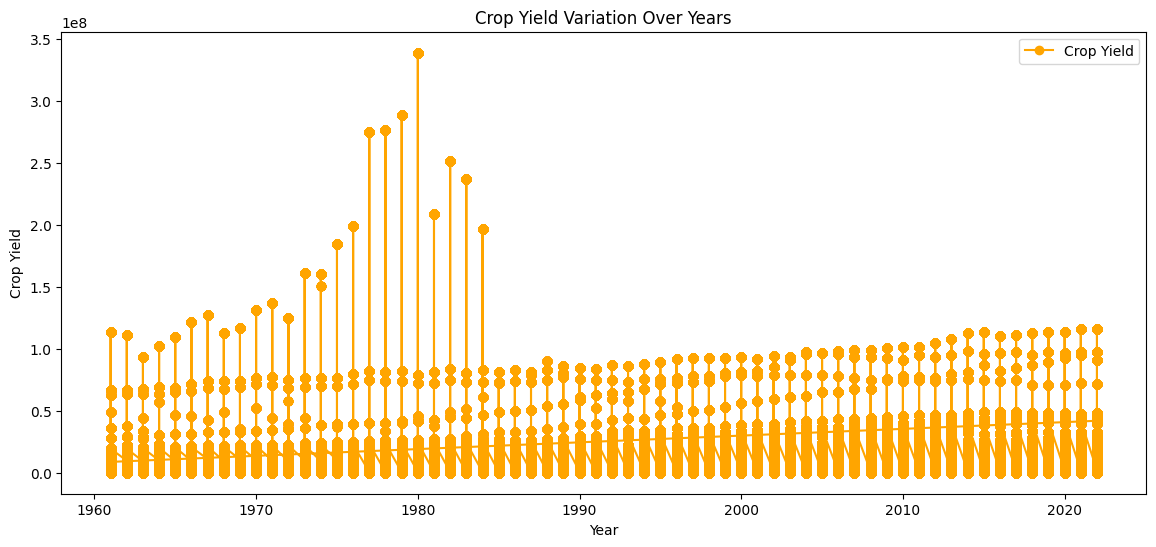

In [47]:
# Time Series Plot for Crop Yield
plt.figure(figsize=(14, 6))
plt.plot(merged_data['Year'], merged_data['Total_Yield'], label='Crop Yield', marker='o', color='orange')
plt.title('Crop Yield Variation Over Years')
plt.xlabel('Year')
plt.ylabel('Crop Yield')
plt.legend()
plt.show()

#### Crop Yield Variation Over Years
The time series plot depicts the variation in crop yield over a series of years, utilizing data from the 'Total_Yield' column. Each data point on the plot represents the total crop yield for a specific year, with circular markers aiding in the visualization of the trend. The x-axis corresponds to the years, providing a chronological overview, while the y-axis indicates the total crop yield. The distinctive orange color of the plot enhances visibility and differentiation from other data. The graphical representation offers a clear insight into the fluctuations and patterns in crop yield over the selected timeframe, facilitating the analysis of agricultural productivity trends across the specified years. This visualization is valuable for identifying potential correlations or trends in crop yield variations and providing a comprehensive understanding of the dataset.

In [58]:
# Convert 'J-D' column to numeric
merged_data['J-D'] = pd.to_numeric(merged_data['J-D'], errors='coerce')

# Create a dropdown widget for crop selection
crop_dropdown = widgets.Dropdown(
    options=merged_data['Item'].unique(),
    value='Apples',
    description='Select Crop:'
)

# Create a function to update the plot based on the selected crop
def update_plot(selected_crop):
    plt.figure(figsize=(14, 6))
    crop_data = merged_data[merged_data['Item'] == selected_crop]

    # Time Series Plot for the selected crop
    plt.plot(crop_data['Year'], crop_data['Total_Yield'], label=f'{selected_crop} Crop Yield', marker='o', color='orange')
    plt.title(f'{selected_crop} Crop Yield Variation Over Years')
    plt.xlabel('Year')
    plt.ylabel('Crop Yield')
    plt.legend()
    plt.show()

# Register the function as an event handler for the widget's value change
interact(update_plot, selected_crop=crop_dropdown)

interactive(children=(Dropdown(description='Select Crop:', index=1, options=('Almonds, in shell', 'Apples', 'A…

<function __main__.update_plot(selected_crop)>

#### Selected crop yield variation over years
This interactive time series plot allows users to dynamically explore and analyze the variation in crop yield over different years for a specific crop. Utilizing a dropdown widget, users can select their crop of interest, with the default set to 'Apples'. The plot, presented in a visually appealing orange color, showcases the total crop yield for the chosen crop across various years. Each data point on the plot corresponds to a specific year, and circular markers emphasize the yield values. This interactive feature enhances the user's ability to investigate the specific trends and patterns associated with different crops, facilitating a more targeted exploration of agricultural productivity over time. The x-axis represents the chronological sequence of years, while the y-axis indicates the total crop yield, providing an insightful and accessible visualization of crop yield variations.

In contrast to the previous static plot, this interactive visualization allows for a more intuitive exploration of the consistent rise in total yield for any chosen crop across various years.

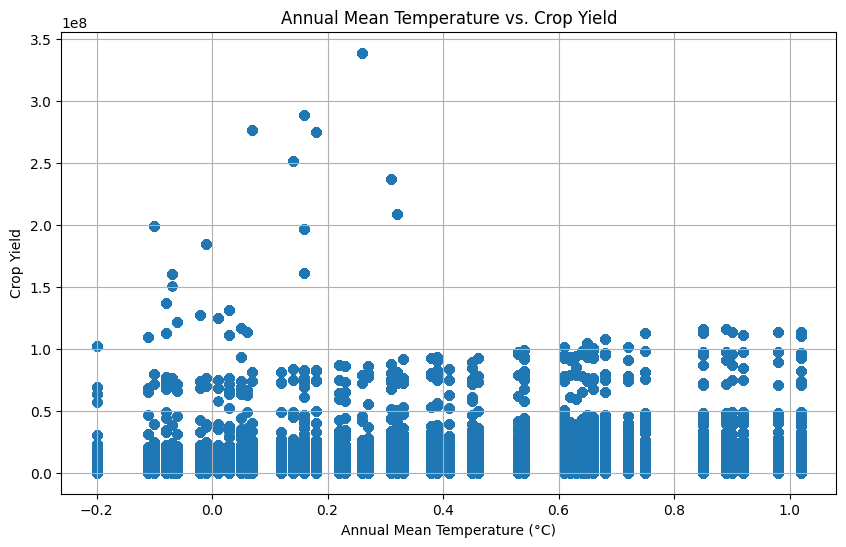

In [70]:
# Scatter Plot for Annual Mean Temperature vs. Total Yield
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['J-D'], merged_data['Total_Yield'], alpha=0.7)
plt.title('Annual Mean Temperature vs. Crop Yield')
plt.xlabel('Annual Mean Temperature (°C)')
plt.ylabel('Crop Yield')
plt.grid(True)
plt.show()


#### Annual mean Temperature vs crop yield

This scatter plot visually explores the relationship between annual mean temperature (represented by the 'J-D' column) and total crop yield. Each point on the plot corresponds to a specific year, with the x-axis indicating the annual mean temperature in degrees Celsius and the y-axis representing the total crop yield. The transparency (alpha) of the markers is set to 0.7 to provide a sense of density in regions with overlapping points. The plot allows for a qualitative assessment of any potential correlation between temperature and crop yield, with a grid overlay aiding in easier interpretation. While patterns in the data may be observed, a more detailed analysis and quantification of the relationship can be achieved through additional statistical methods or regression analysis.

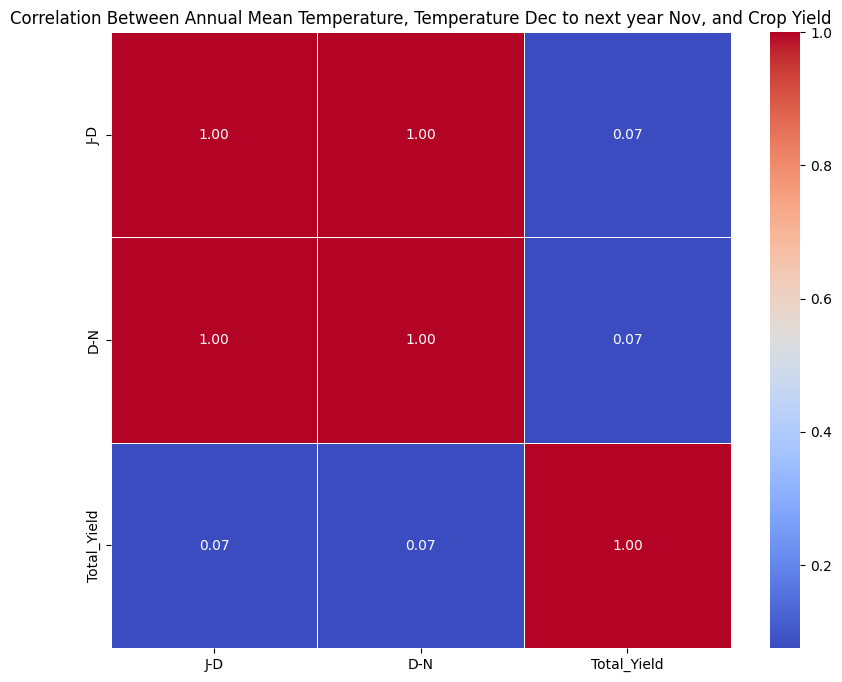

In [71]:
import seaborn as sns

# Convert 'D-N' column to numeric, handling errors with coerce
merged_data['D-N'] = pd.to_numeric(merged_data['D-N'], errors='coerce')

# Select relevant columns
selected_columns = ['J-D', 'D-N', 'Total_Yield']

# Use corr with numeric_only parameter
correlation_matrix = merged_data[selected_columns].corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Annual Mean Temperature, Temperature Dec to next year Nov, and Crop Yield')
plt.show()

### 5. Result
#### Heatmap for correlation between J-D, D-N and Total Yield
This heatmap provides a comprehensive visual representation of the correlation between annual mean temperature ('J-D'), temperature at night ('D-N'), and total crop yield. The color-coded cells indicate the strength and direction of the correlation, with warmer colors (such as red) representing a positive correlation, cooler colors (like blue) indicating a negative correlation, and values close to zero suggesting a weak or no correlation. The annotated numerical values within each cell quantify the correlation coefficients, facilitating a more precise interpretation. This visualization is instrumental in identifying potential relationships and dependencies between these key variables, offering valuable insights into how nighttime temperature variations may contribute to overall crop yield variations in the dataset.

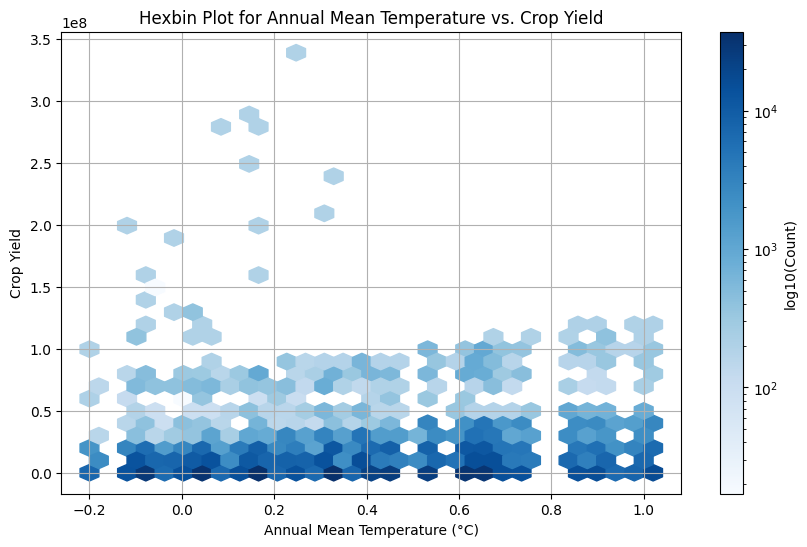

In [60]:
# Hexbin Plot for Annual Mean Temperature vs. Total Yield
plt.figure(figsize=(10, 6))
plt.hexbin(merged_data['J-D'], merged_data['Total_Yield'], gridsize=30, cmap='Blues', bins='log')
plt.title('Hexbin Plot for Annual Mean Temperature vs. Crop Yield')
plt.xlabel('Annual Mean Temperature (°C)')
plt.ylabel('Crop Yield')
plt.colorbar(label='log10(Count)')
plt.grid(True)
plt.show()


#### Hexbin plot for Annual Mean Temperature vs. Crop Yield
This hexbin plot effectively visualizes the relationship between annual mean temperature ('J-D') and total crop yield. Instead of displaying individual data points, the hexagonal bins provide a smoothed representation of the data density. The color intensity of each hexagon corresponds to the logarithm of the count of data points within that bin, with a colorbar on the right indicating the log-scale count values. This type of plot is particularly useful for identifying patterns and trends in the joint distribution of temperature and crop yield, especially in regions where the data points are concentrated. The hexbin plot offers a balance between granularity and clarity, making it easier to discern density patterns and variations in the dataset.

In [59]:
# Convert 'J-D' column to numeric
merged_data['J-D'] = pd.to_numeric(merged_data['J-D'], errors='coerce')

# Create a dropdown widget for crop selection
crop_dropdown = widgets.Dropdown(
    options=merged_data['Item'].unique(),
    value='Avocados',
    description='Select Crop:'
)

# Create a function to update the plot based on the selected crop
def update_plot(selected_crop):
    plt.figure(figsize=(10, 6))
    crop_data = merged_data[merged_data['Item'] == selected_crop]

    # Scatter Plot for Annual Mean Temperature vs. Total Yield with a regression line
    sns.regplot(x='J-D', y='Total_Yield', data=crop_data, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})

    plt.title(f'Annual Mean Temperature vs. Crop Yield ({selected_crop})')
    plt.xlabel('Annual Mean Temperature (°C)')
    plt.ylabel('Crop Yield')
    plt.grid(True)
    plt.show()

# Register the function as an event handler for the widget's value change
interact(update_plot, selected_crop=crop_dropdown)


interactive(children=(Dropdown(description='Select Crop:', index=145, options=('Almonds, in shell', 'Apples', …

<function __main__.update_plot(selected_crop)>

#### Interactive plot to visualise Annual Mean Temperature vs. Total yield for choosen crop
This interactive scatter plot with a regression line allows users to explore the relationship between the annual mean temperature ('J-D') and the total crop yield for a specific crop selected from the dropdown menu. In this case, the default crop is set to 'Avocados.' The scatter plot displays individual data points, representing the annual mean temperature on the x-axis and the corresponding total crop yield on the y-axis. The red regression line helps visualize the trend in the data, showcasing the correlation between increasing annual mean temperature and the total yield of the selected crop. As the temperature increases, the regression line provides insight into how the crop yield tends to respond. Users can easily switch between different crops in the dropdown menu to observe variations in the correlation patterns for each crop.

### 6. Conclusion
This project aimed to analyze the correlation between temperature changes and agricultural yields using data from NASA GISS for temperature variations and FAO for crop yields. Throughout the analysis, we performed data loading and transformation, exploring the datasets' characteristics. Visualizations, including time series plots, scatter plots, and correlation matrices, provided insights into the relationship between annual mean temperature and crop yield. Key findings include the visual representation of temperature variations over the years, crop yield variations, and the correlation between temperature metrics ('J-D' and 'D-N') and total crop yield. The interactive features, such as dropdown menus for crop selection, enhanced the ability to focus on specific crops and understand their individual trends. While specific trends varied across crops, the project successfully showcased the potential impact of temperature changes on agricultural yields. Further investigations and refinements can provide more detailed insights into the complex relationship between climate and crop production, aiding in better-informed agricultural strategies and policies.